# Using Object Oriented Programming, Machine Learning, and Beautiful Soup to Predict Sentiment of Movie Reviews

### Program Overview:
- Data Source: The data that I use is from the Stanford Sentiment Treebank (SST-5, or SST-fine-grained) dataset
    - This data is used to train the model
    - It was designed to help evaluate a model’s ability to understand representations of sentence structure
    - SST-5 consists of 11,855 sentences extracted from movie reviews with fine-grained sentiment labels [1–5], as well as 215,154 phrases that compose each sentence in the dataset.
    - https://nlp.stanford.edu/sentiment/
    - This site provides raw data files for testing, training, and validation
- Data Preparation
    - I load the raw data files into my working directory
    - I use a function that modifies these raw data files and returns three new files in the format that is needed to create a dataframe
    - I use matplotlib to return a quick visualization of the distribution of the training data
- Machine Learning
    - Object Oriented Programming
        - I create five classes that make it easier to read in data and perform machine learning on that data
        - For instance, if we receive the training data every week with new data, I can just initiate the class and everything would be completed within a few seconds.
        - I create a base class  (standard procedures for uploading and modifying the datasets), a Vadar Sentiment Class (to perform Vadar Sentiment Machine Learning), a Logistic Regression Class (to perform logistic regression  Machine Learning), and a SVM Class (to perform support vector machine Machine Learning).
        - I initiate the classes for each machine learning model, create a column for the prediction scores, and output the accuracy scores by calling the class Base with the accuracy function.
- Unstructured Data - IMDb Movie Review
    - Finally, I want to implement one of the machine learning models to predict a sentiment score for data not seen before.
    - I use BeautifulSoup to scrape the IMDb website 
        - Specifically, I focus on the webpage that provides user reviews for The Shawshank Redemption.
        - https://www.imdb.com/title/tt0111161/reviews?ref_=tt_ql_3
    - I create a function and class to extract one of the reviews 
    - Finally, I initiate the Vadar Sentiment Class to predict a sentiment score for that review.

In [1]:
# Import the libraries
import pytreebank
import sys
import os

In [2]:
# Get current working directory
os.getcwd()

'C:\\Users\\lucasdanielzarzeczny'

In [3]:
# Change the working directory
# Change the working directory
os.chdir('C:\\Users\\lucasdanielzarzeczny')

In [4]:
# check current directory is in place
currentDirectory = os.getcwd()
print(currentDirectory)

C:\Users\lucasdanielzarzeczny


In [5]:
# Create a path for the file output (notebook)
out_path = os.path.join(sys.path[0], 'sst_{}.txt')

In [6]:
# Load the raw data sets from the pytreebank library (into current working director)
dataset = pytreebank.load_sst('./raw_data')

In [7]:
# Store train, dev and test in separate files 
# This function takes the raw data files (train, test, and dev) and outputs three different files
# These new files create a label (rating) for each line that is separated by a tab

for category in ['train', 'test', 'dev']:
    with open(out_path.format(category), 'w') as outfile:
        for item in dataset[category]:
            outfile.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] + 1,
                item.to_labeled_lines()[0][1]
            ))

In [8]:
# Print the length of the training set
print(len(dataset['train']))

8544


In [9]:
# Importing pandas to create a dataframe
import pandas as pd

In [10]:
# Get current working directory
os.getcwd()

'C:\\Users\\lucasdanielzarzeczny'

In [11]:
# Read train data
# check current directory is in place
currentDirectory = os.getcwd()
print(currentDirectory)

C:\Users\lucasdanielzarzeczny


In [12]:
#os.listdir(os.getcwd())

In [13]:
# Read train data and split the columns by a comma and create two new headings
df = pd.read_csv("sst_train.csv", sep=',', header=None, names=['truth', 'text'])

In [14]:
# Replace the label with a blank so the number just exists (the level)
df['truth'] = df['truth'].str.replace('__label__', '')

In [15]:
# convert the number portion to a category since we are ranking the movies
df['truth'] = df['truth'].astype(int).astype('category')

In [16]:
# list the first 5 observations
df.head()

,truth,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .


In [17]:
# Check the shape of the data - have 8544 training observations
df.shape[0]

8544

In [18]:
# Deep dive into the data
# What is the distribution of the data like? Particularly, by truth
import matplotlib.pyplot as plt

Text(0, 0.5, 'Label')

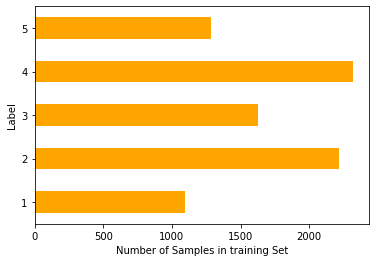

In [19]:
ax = df['truth'].value_counts(sort=False).plot(kind='barh', color = "orange")
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('Label')
# Most ratings are a 4 and 2, weakly negative/positive classes

In [20]:
# Create a new column that stores the string length of each text sample
# Sort the DataFrame rows in ascending order of their text lengths.

In [21]:
df['len'] = df['text'].str.len()  # Store string length of each sample

In [22]:
df = df.sort_values(['len'], ascending=True)
df.head(25)

,truth,text,len
593,3,Go .,4
8484,3,Eh .,4
4198,4,Wow .,5
5286,4,Yes .,5
5288,2,No. .,5
1270,2,Why ?,5
2038,3,A. . .,6
335,4,Cool .,6
7669,3,Bang !,6
7670,4,Zoom !,6


Idea here is that observations that have limited context and only a few characters in length can mess up the prediction 
capability of the model. For instance, the word "cool" is all by itself, yet the model is giving this one word sentence
a really high truth rating of 4 (weakly positive). But, we all know cool is more of an understanding, 
not a strength of sentiment.

### Machine Learning and Object Oriented Programming

In [23]:
# Machine learning
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score

- Base class is defined in Python that contains the commonly used methods: one for reading in the SST-5 data into a Pandas DataFrame (read_data), and another to calculate the model’s classification accuracy and F1-score (accuracy).
- Each individual classifier added to the framework must inherit the Base class defined above.
- a score method and a predict method are included with each new sentiment classifier, as shown below.
- The score method outputs a unique sentiment class for a text sample
- The predict method applies the score method to every sample in the test dataset to output a new column, 'pred' in the test DataFrame.
- Compute the model's accuracy and F1 Scores by using the accuracy method based in Base class

### Sentiment Scoring
- Sentiment Scoring
- Need to convert our values to type discrete
- The continous "compound" polarity score (float) is converted to a discrete value using binning through pd.cut function
- Returns 1 of 5 classes for each test sample, stored a a new column in the resulting dataframe

### Create all of the classes for the files, accuracy, score, and machine learning models

In [24]:
class Base:
    """Base class that houses common utilities for reading in test data
    and calculating model accuracy and F1 scores.
    """
    def __init__(self) -> None:
        pass

    def read_data(self, fname: str, lower_case: bool=False,
                  colnames=['truth', 'text']) -> pd.DataFrame:
        "Read in test data into a Pandas DataFrame"
        df = pd.read_csv(fname, sep=',', header=None, names=colnames)
        df['truth'] = df['truth'].str.replace('__label__', '')
        # Categorical data type for truth labels
        df['truth'] = df['truth'].astype(int).astype('category')
        # Optional lowercase for test data (if model was trained on lowercased text)
        if lower_case:
            df['text'] = df['text'].str.lower()
        return df

    def accuracy(self, df: pd.DataFrame) -> None:
        "Prediction accuracy (percentage) and F1 score"
        acc = accuracy_score(df['truth'], df['pred'])*100
        f1 = f1_score(df['truth'], df['pred'], average='macro')
        print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

In [25]:
class ExampleSentiment(Base):
    """Predict sentiment scores using using X classifier"""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()   # Inherit methods from Base class

    def score(self, text: str) -> int:
        """Return a sentiment score on sample text, an integer in the range [1, 2, 3, 4, 5]"""
        # Apply some sentiment scoring technique here
        
    def predict(self, train_file: None, test_file: str, lower_case: bool) -> pd.DataFrame:
        """Return a Pandas DataFrame that applies the sentiment scoring method on each
           row of the test set
        """
        df = self.read_data(test_file, lower_case)
        df['pred'] = df['text'].apply(self.score)

In [26]:
class VaderSentiment(Base):
    """Predict fine-grained sentiment classes using Vader."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        self.vader = SentimentIntensityAnalyzer()

    def score(self, text: str) -> float:
        return self.vader.polarity_scores(text)['compound']

    def predict(self, train_file: None, test_file: str, lower_case: bool) -> pd.DataFrame:
        "Return DataFrame with a new column of predicted labels"
        df = self.read_data(test_file, lower_case)
        df['score'] = df['text'].apply(self.score)
        # Convert float score to category based on binning
        df['pred'] = pd.cut(df['score'], bins=5, labels=[1, 2, 3, 4, 5])
        df = df.drop('score', axis=1)
        return df

In [94]:
class LogisticRegressionSentiment(Base):
    """Predict fine-grained sentiment scores using a sklearn Logistic Regression pipeline."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.linear_model import LogisticRegression
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
            ]
        )

    def predict(self, train_file: str, test_file: str, lower_case: bool=False) -> pd.DataFrame:
        "Train model using sklearn pipeline"
        train_df = self.read_data(train_file, lower_case)
        learner = self.pipeline.fit(train_df['text'], train_df['truth'])
        # Predict class labels using the learner and output DataFrame
        test_df = self.read_data(test_file, lower_case)
        test_df['pred'] = learner.predict(test_df['text'])
        return test_df

In [80]:
class SVMSentiment(Base):
    """Predict fine-grained sentiment scores using a sklearn 
    linear Support Vector Machine (SVM) pipeline."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.linear_model import SGDClassifier
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None,
                )),
            ]
        )

    def predict(self, train_file: str, test_file: str, lower_case: bool=False) -> pd.DataFrame:
        "Train model using sklearn pipeline"
        train_df = self.read_data(train_file, lower_case)
        learner = self.pipeline.fit(train_df['text'], train_df['truth'])
        # Predict class labels using the learner and output DataFrame
        test_df = self.read_data(test_file, lower_case)
        test_df['pred'] = learner.predict(test_df['text'])
        return test_df

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm

In [60]:
# Read test data and split the columns by a comma and create two new headings
df = pd.read_csv("sst_test.csv", sep=',', header=None, names=['truth', 'text'])
df['truth'] = df['truth'].str.replace('__label__', '')
df['truth'] = df['truth'].astype(int).astype('category')
print(df.dtypes)
df.head()

truth    category
text       object
dtype: object


,truth,text
0,3,Effective but too-tepid biopic
1,4,If you sometimes like to go to the movies to h...
2,5,"Emerges as something rare , an issue movie tha..."
3,3,The film provides some great insight into the ...
4,5,Offers that rare combination of entertainment ...


In [61]:
import nltk
vader = SentimentIntensityAnalyzer()
def score_vader(sentence, vader):
    return vader.polarity_scores(sentence)['compound']

In [62]:
# Calculate Vader sentiment score
df['vader_score'] = df['text'].apply(lambda x: score_vader(x, vader))
# Convert float score to category based on binning
df['vader_pred'] = pd.cut(df['vader_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('vader_score', axis=1)
df.head()

,truth,text,vader_pred
0,3,Effective but too-tepid biopic,4
1,4,If you sometimes like to go to the movies to h...,5
2,5,"Emerges as something rare , an issue movie tha...",5
3,3,The film provides some great insight into the ...,5
4,5,Offers that rare combination of entertainment ...,4


In [63]:
def print_accuracy(df, pred_column):
    "Print f1 score and accuracy after making predictions"
    f1_macro = f1_score(df['truth'], df[pred_column], average='macro')
    acc = accuracy_score(df['truth'], df[pred_column])*100
    return f1_macro, acc

In [64]:
# Get model accuracy and f1 score
acc = print_accuracy(df, 'vader_pred')
print("Macro F1-score: {}\nAccuracy: {}".format(acc[0], acc[1]))

Macro F1-score: 0.31297326018199634
Accuracy: 31.538461538461537


### Using Object Oriented Programming - Machine Learning Vader Sentiment

- Uses a sentiment lexicon that contains intensity measures for each word based on human-annotated labels
- Designed with a focus on social media texts
- This means that it puts a lot of emphasis on rules that capture the essence of text typically seen on social media
- for example, short sentences with emojis, repetitive vocabulary and copious use of punctuation
- VADER breaks down sentiment intensity scores into a positive, negative and neutral component, which are then normalized and squashed to be within the range [-1, 1] as a “compound” score
- As we add more exclamation marks, capitalization and emojis/emoticons, the intensity gets more and more extreme (towards +/- 1).

In [85]:
# Initialize the class
testA = Base()

In [66]:
b = testA.read_data("sst_test.csv")

In [67]:
# Using Vader Sentiment
c = VaderSentiment(b)

In [68]:
# Lets get a prediction score for Vader Sentiment from our test set now
e = c.predict("sst_train","sst_test.csv", True)

In [69]:
e

,truth,text,pred
0,3,effective but too-tepid biopic,4
1,4,if you sometimes like to go to the movies to h...,5
2,5,"emerges as something rare , an issue movie tha...",5
3,3,the film provides some great insight into the ...,5
4,5,offers that rare combination of entertainment ...,4
...,...,...,...
2205,4,an imaginative comedy/thriller .,3
2206,5,"( a ) rare , beautiful film .",5
2207,5,( an ) hilarious romantic comedy .,5
2208,4,never ( sinks ) into exploitation .,3


In [70]:
f = testA.accuracy(e)

Accuracy: 31.538461538461537
Macro F1-score: 0.3132222711234521


In [71]:
# Now use the model to predict on other text 
# Based on text
# Import text from Rotten Tomatoes
d = c.score("This is horrible")

In [72]:
# The score of the text
d

-0.5423

### Using Object Oriented Programming - Machine Learning Logistic Regression

- The input features and their weights are fed into an activation function (a sigmoid for binary classification, or a softmax for multi-class). The output of the classifier is just the index of the sigmoid/softmax vector with the highest value as the class label.
- Use scikit-learn’s CountVectorizer to transform the text into features
- This converts the entire corpus (i.e. all sentences) of our training data into a matrix of token counts.
- The count matrix is converted to a TF-IDF (Term-frequency Inverse document frequency) representation.
- Once we obtain the TF-IDF representation of the training corpus, the classifier is trained by fitting it to the existing features.
- A “newton-cg” solver is used for optimizing the loss in the logistic regression and L2 regularization is used by default.
- A sentiment label is returned for each test sample (using scikit-learn’s learner.predict method) as the index of the maximum class probability in the softmax output vector.

In [95]:
# Initialize the class
testB = Base()

In [96]:
l = testB.read_data("sst_test.csv")

In [98]:
# Using Vader Sentiment
m = LogisticRegressionSentiment(l)

In [100]:
# Lets get a prediction score for Logistic Regression from our test set now
n = m.predict("sst_train.csv","sst_test.csv")

In [101]:
n

,truth,text,pred
0,3,Effective but too-tepid biopic,2
1,4,If you sometimes like to go to the movies to h...,4
2,5,"Emerges as something rare , an issue movie tha...",5
3,3,The film provides some great insight into the ...,4
4,5,Offers that rare combination of entertainment ...,5
...,...,...,...
2205,4,An imaginative comedy/thriller .,4
2206,5,"( A ) rare , beautiful film .",5
2207,5,( An ) hilarious romantic comedy .,5
2208,4,Never ( sinks ) into exploitation .,2


In [102]:
o = testB.accuracy(n)

Accuracy: 40.18099547511312
Macro F1-score: 0.3295860165192341


### Using Object Oriented Programming - Machine Learning Support Vector Machine

- use of “kernel functions”, i.e. functions that transform a complex, nonlinear decision space to one that has higher dimensionality, so that an appropriate hyperplane separating the data points can be found. 
- The SVM classifier looks to maximize the distance of each data point from this hyperplane using “support vectors” that characterize each distance as a vector.
- A key feature of SVMs is the fact that it uses a hinge loss rather than a logistic loss. This makes it more robust to outliers in the data, since the hinge loss does not diverge as quickly as a logistic loss.
- Obtain the TF-IDF representation of the training corpus
- Train the SVM model by fitting it to the training data features
- A hinge loss function with a stochastic gradient descent (SGD) optimizer is used, and L2 regularization is applied during training. 
- The sentiment label is returned (using scikit-learn’s learner.predict method) as the index of the maximum class probability in the softmax output vector.

In [114]:
# Initialize the class
testC = Base()

In [117]:
t = testC.read_data("sst_test.csv")

In [118]:
# Using the Logistic Regression Class
q = LogisticRegressionSentiment(t)

In [119]:
# Lets get a prediction score for Logistic Regression from our test set now
v = q.predict("sst_train.csv","sst_test.csv")

In [120]:
v

,truth,text,pred
0,3,Effective but too-tepid biopic,2
1,4,If you sometimes like to go to the movies to h...,4
2,5,"Emerges as something rare , an issue movie tha...",5
3,3,The film provides some great insight into the ...,4
4,5,Offers that rare combination of entertainment ...,5
...,...,...,...
2205,4,An imaginative comedy/thriller .,4
2206,5,"( A ) rare , beautiful film .",5
2207,5,( An ) hilarious romantic comedy .,5
2208,4,Never ( sinks ) into exploitation .,2


In [121]:
w = testC.accuracy(v)

Accuracy: 40.18099547511312
Macro F1-score: 0.3295860165192341


### Unstructured Data: Pulling data from IMDB

In [137]:
# import the appropriate libraries
import requests # pip install requests
from bs4 import BeautifulSoup #pip install bs4

In [138]:
url = 'https://www.imdb.com/title/tt0111161/reviews?ref_=tt_ql_3'

In [196]:
def main():
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    review = soup.findAll('div', {'class' :'text show-more__control'})
    review4 = review[4]
    return(review4)

In [197]:
if __name__ == '__main__':
    main()

In [198]:
review = main()

In [199]:
review_as_text = review.text

In [200]:
review_as_text 

"I have never seen such an amazing film since I saw The Shawshank Redemption. Shawshank encompasses friendships, hardships, hopes, and dreams.  And what is so great about the movie is that it moves you, it gives you hope.  Even though the circumstances between the characters and the viewers are quite different, you don't feel that far removed from what the characters are going through.It is a simple film, yet it has an everlasting message.  Frank Darabont didn't need to put any kind of outlandish special effects to get us to love this film, the narration and the acting does that for him.  Why this movie didn't win all seven Oscars is beyond me, but don't let that sway you to not see this film, let its ranking on the IMDb's top 250 list sway you, let your friends recommendation about the movie sway you.Set aside a little over two hours tonight and rent this movie.  You will finally understand what everyone is talking about and you will understand why this is my all time favorite movie."

### Analyzing text via Vader Sentiment

In [191]:
# Predict the sentiment score of this texts

In [192]:
# Initialize the class
testA = Base()

In [193]:
b = testA.read_data("sst_test.csv")

In [194]:
# Using Vader Sentiment
c = VaderSentiment(b)

In [195]:
# Lets get a prediction score for Vader Sentiment from our test set now
e = c.predict("sst_train","sst_test.csv", True)

In [201]:
# Grab a score for the text pulled from IMDB
d = c.score(review_as_text)

In [203]:
# Print Score
d

0.9682

### Sentiment Review and Conclusion

- As a recap the text we pulled in from IMDB:
    - "I have never seen such an amazing film since I saw The Shawshank Redemption. Shawshank encompasses friendships, hardships, hopes, and dreams.  And what is so great about the movie is that it moves you, it gives you hope.  Even though the circumstances between the characters and the viewers are quite different, you don't feel that far removed from what the characters are going through.It is a simple film, yet it has an everlasting message.  Frank Darabont didn't need to put any kind of outlandish special effects to get us to love this film, the narration and the acting does that for him.  Why this movie didn't win all seven Oscars is beyond me, but don't let that sway you to not see this film, let its ranking on the IMDb's top 250 list sway you, let your friends recommendation about the movie sway you.Set aside a little over two hours tonight and rent this movie.  You will finally understand what everyone is talking about and you will understand why this is my all time favorite movie."
    - Confident that from a non machine learning approach - this is a very positive review
- The Vadar sentiment score ranges from [-1, 1] with 1 being very positive. 
- The score, as witnessed above, is .9682. This machine learning model also predicts this review to be extremely positive!